In [24]:
import matplotlib.pyplot as plt
import plotters 
import h5py
import os
import numpy as np 
import sys 
sys.path.append("../code/")
import path_handler as PH #type: ignore
import StreamOrbitCoords as SOC
import data_extractors as DE #type: ignore
import gap_or_no_gap_statistics as GONGS #type: ignore

In [2]:
GCname="Pal5"
perturber="NGC3201"
potential = "pouliasis2017pii-Pal5-suspects"
PH.impact_geometry_results(GCname,perturber,potential)

'/scratch2/sferrone/intermediate-products/impact-geometry-results/pouliasis2017pii-Pal5-suspects/Pal5/Pal5-NGC3201-erkal-impact-geometry.hdf5'

In [3]:
path_to_geom_files=PH.base['impact-geometry-results']+potential+"/"+GCname+"/"

In [4]:
filenames=os.listdir(path_to_geom_files)

In [5]:
hole_punchers=GONGS.obtain_perturbers_per_monte_carlo()

In [6]:
column_names=GONGS.make_erkal_column_names_for_pandas_DF(path_to_geom_files,filenames)
data_frame=GONGS.initialize_data_frame(column_names)

In [7]:
path_to_geom_files

'/scratch2/sferrone/intermediate-products/impact-geometry-results/pouliasis2017pii-Pal5-suspects/Pal5/'

In [8]:
filename=filenames[0]
geometryfile=h5py.File(path_to_geom_files+filename,'r')

In [9]:
montecarlokeys=list(geometryfile.keys())
perturber=filename.split("-")[1]
montecarlokey=montecarlokeys[0]

In [10]:
DF=GONGS.extract_all_statistics_into_data_frame("Pal5",potential)

/obs/sferrone/stream_analysis/analysis/gap_or_no_gap_statistics.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dataFrame=pd.concat([dataFrame,pd.DataFrame([dataDict])],ignore_index=True)


In [11]:
DF_numbers = DF.drop(["monte_carlo","perturber",],axis=1)

In [12]:
import seaborn as sns

/obs/sferrone/py-env-gc/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


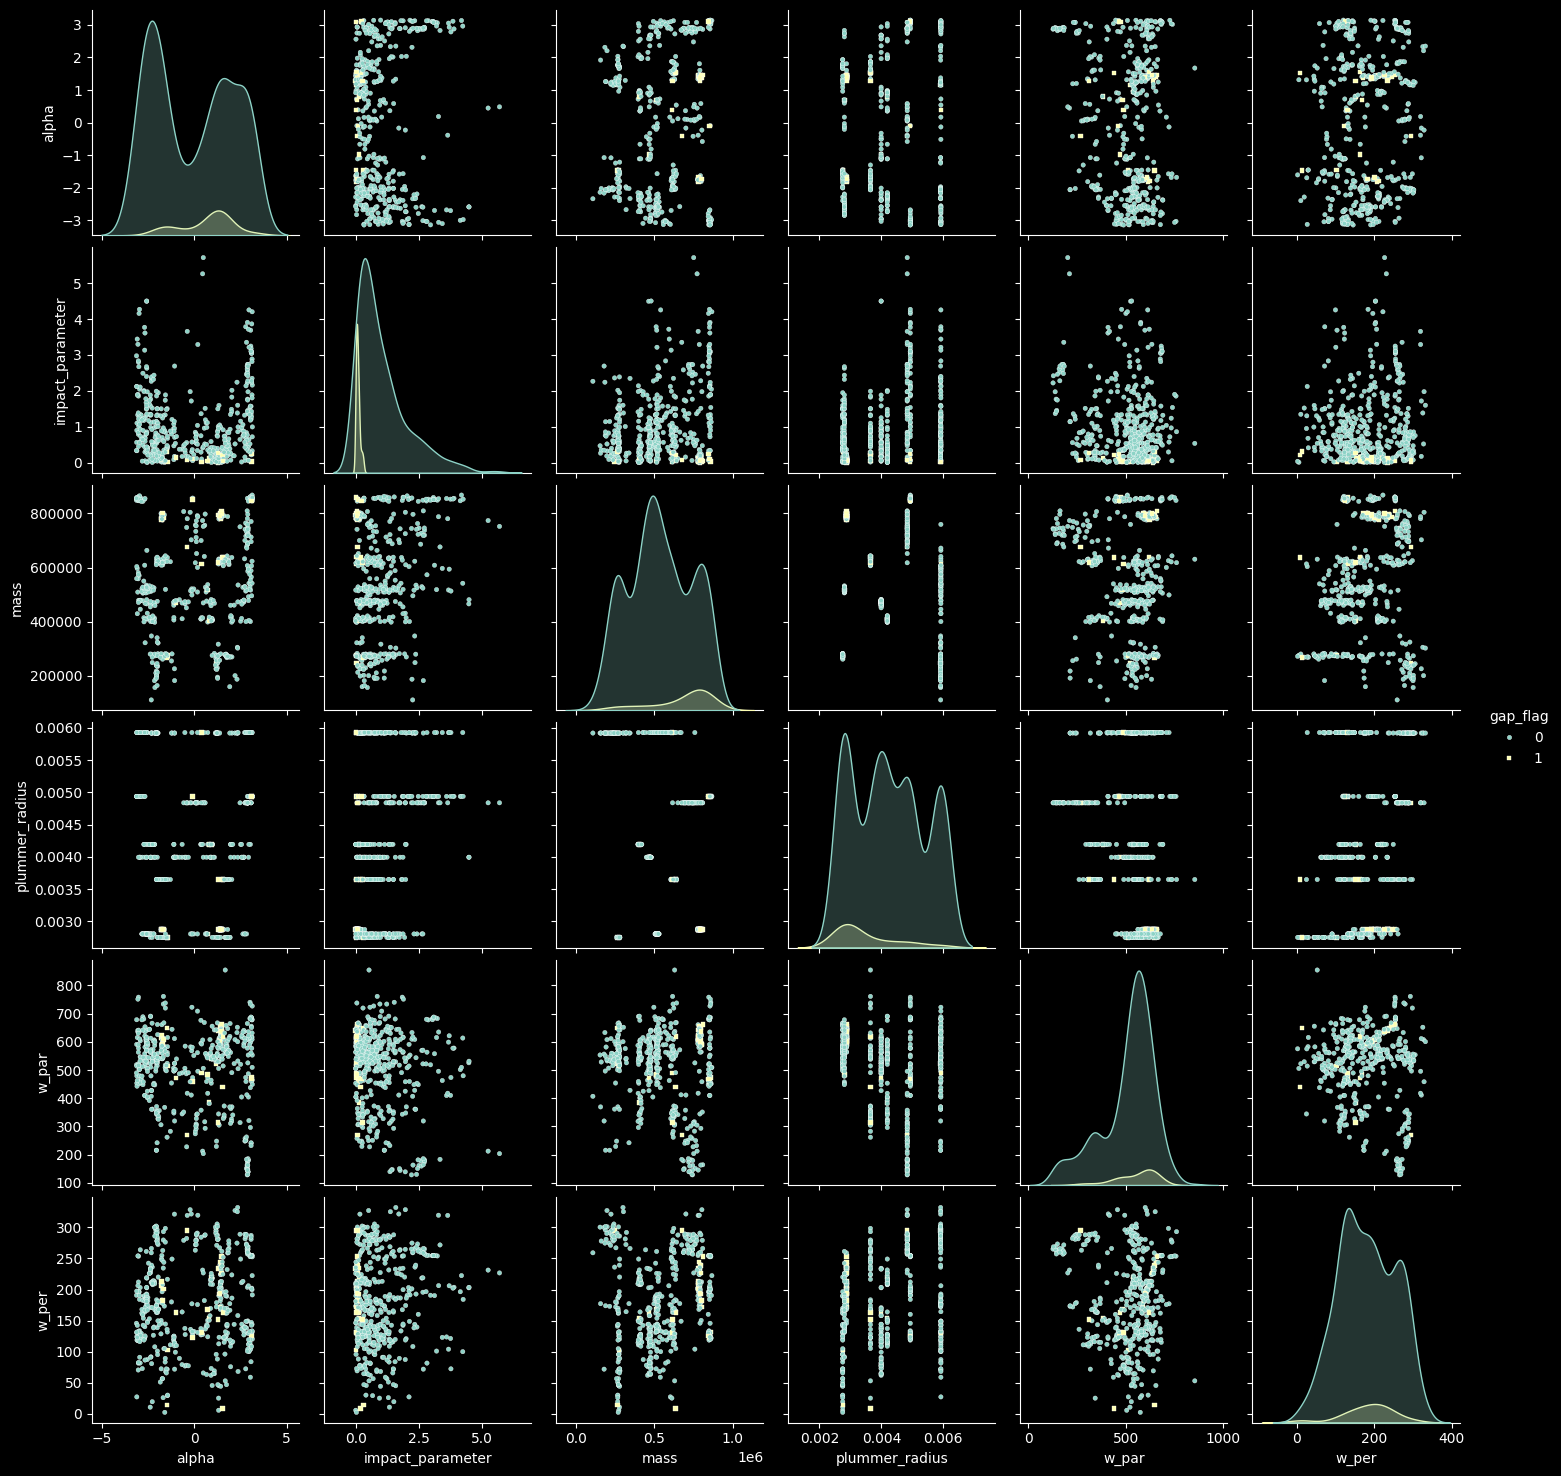

In [19]:
sns.pairplot(DF_numbers,hue="gap_flag",markers=["o","s"],plot_kws={"s":10})

In [21]:
V = np.sqrt(DF_numbers["w_par"]**2 + DF_numbers["w_per"]**2)
P = DF_numbers["mass"]*DF_numbers["impact_parameter"]/V

In [46]:
bins=np.logspace(-1,4,20)

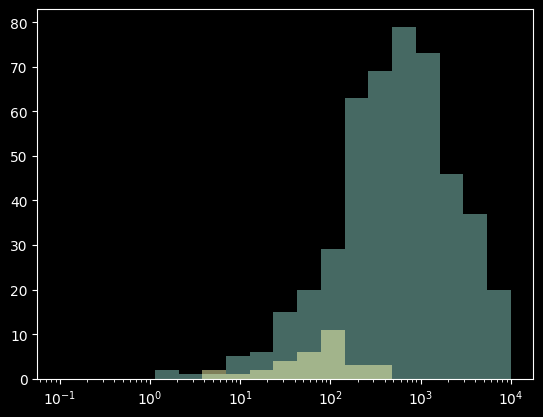

In [47]:
fig,axis=plt.subplots(1,1)
counts,edges,bar=axis.hist(P[DF_numbers["gap_flag"]==0],bins=bins,alpha=0.5,label="no gap")
axis.hist(P[DF_numbers["gap_flag"]==1],bins=edges,alpha=0.5,label="gap");
axis.set_xscale("log")

Text(0.5, 0, 'impact parameters')

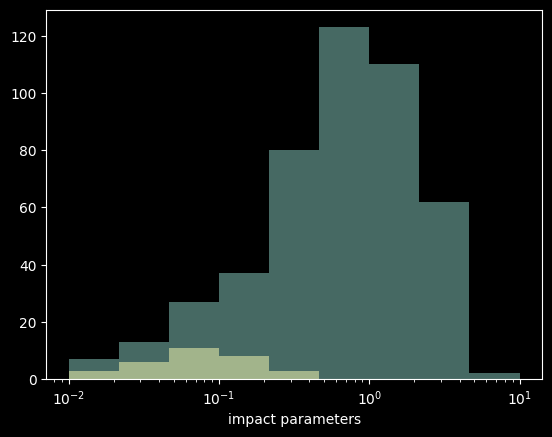

In [53]:
bins=np.logspace(-2,1,10)
fig,axis=plt.subplots(1,1)
counts,edges,bar=axis.hist(DF_numbers['impact_parameter'][DF_numbers["gap_flag"]==0],bins=bins,alpha=0.5,label="no gap")
axis.hist(DF_numbers['impact_parameter'][DF_numbers["gap_flag"]==1],bins=edges,alpha=0.5,label="gap");
axis.set_xscale("log")
axis.set_xlabel("impact parameters")